# Sentiment Classification


### Generate Word Embeddings and retrieve outputs of each layer with Keras based on Classification task

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.

It is a distributed representation for text that is perhaps one of the key breakthroughs for the impressive performance of deep learning methods on challenging natural language processing problems.

We willl use the imdb dataset to learn word embeddings as we train our dataset. This dataset contains 25,000 movie reviews from IMDB, labeled with sentiment (positive or negative). 



### Dataset

`from keras.datasets import imdb`

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocab size of 10,000.

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.


### Aim

1. Import test and train data  
2. Import the labels ( train and test) 
3. Get the word index and then Create key value pair for word and word_id. (12.5 points)
4. Build a Sequential Model using Keras for Sentiment Classification task. (10 points)
5. Report the Accuracy of the model. (5 points)  
6. Retrive the output of each layer in keras for a given single test sample from the trained model you built. (2.5 points)


#### Usage:

In [1]:
from keras.datasets import imdb

vocab_size = 10000 #vocab size

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size) # vocab_size is no.of words to consider from the dataset, ordering based on frequency.

Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [3]:
len(x_train[1])

189

In [4]:
len(x_train[0])

218

In [0]:
import pandas as pd
import numpy as np

In [6]:
pd.Series(y_train).value_counts()

1    12500
0    12500
dtype: int64

In [0]:
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 300  #number of word used from each review

In [0]:
#load dataset as a list of ints
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test =  pad_sequences(x_test, maxlen=maxlen)

In [9]:
x_train[0].shape

(300,)

In [10]:
x_train[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,  194, 1153,  194, 8255,   78,  228,    5,    6, 1463,
       4369, 5012,  134,   26,    4,  715,    8,  118, 1634,   14,  394,
         20,   13,  119,  954,  189,  102,    5,  207,  110, 3103,   21,
         14,   69,  188,    8,   30,   23,    7,   

<h3>Get the word index and then Create key value pair for word and word_id. (12.5 points)</h3>

In [0]:
word_to_index = imdb.get_word_index()
for (k,v) in word_to_index.items():
  word_to_index[k] = v + 3

index_to_word = {}
index_to_word[0] = "PAD"
index_to_word[1] = "START"
index_to_word[2] = "OOV"
for (k,v) in word_to_index.items():
  index_to_word[v] = k

In [12]:
index_to_word

{0: 'PAD',
 1: 'START',
 2: 'OOV',
 34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272'

In [13]:
len(x_train)

25000

<h4>Reconstructing the first 10 reviews using the word index and cross check with label </h4>

In [14]:
x_train[0:10]

array([[  0,   0,   0, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [ 44,  12,  17, ...,  72,  33,  32],
       [  0,   0,   0, ...,  28, 126, 110],
       [  0,   0,   0, ...,   7,  43,  50]], dtype=int32)

In [15]:
counter = 0
for review in x_train[0:10]:
  review_text = ''
  for index in review:
    if (index != 0):
      if (index != 1):
        if(index != 2):
          review_text =  review_text +' '+index_to_word.get(index)
  print('review - '+str(counter)+'->'+review_text)
  print(y_train[counter])
  counter = counter+1

review - 0-> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert is an amazing actor and now the same being director father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also to the two little boy's that played the of norman and paul they were just brilliant children are often left out of the list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thin

## Build Keras Embedding Layer Model
We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexible and can be used in a few ways:

* The embedding layer can be used at the start of a larger deep learning model. 
* Also we could load pre-train word embeddings into the embedding layer when we create our model.
* Use the embedding layer to train our own word2vec models.

The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [0]:
from keras.layers import Embedding,Flatten,Dense
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(Embedding(10000,64,input_length=300))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 64)           640000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 19200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1228864   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,868,929
Trainable params: 1,868,929
Non-trainable params: 0
_________________________________________________________________


In [19]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
es = EarlyStopping(monitor='val_acc',patience=3,verbose=1,mode='auto')
mc = ModelCheckpoint('/content/gdrive/My Drive/Assignment/SentimentClassification/best_embed_model.h5',monitor='val_acc',verbose=1,save_best_only=True)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 11s 431us/step - loss: 0.3860 - acc: 0.8116 - val_loss: 0.3507 - val_acc: 0.8460

Epoch 00001: val_acc improved from -inf to 0.84604, saving model to /content/gdrive/My Drive/Assignment/SentimentClassification/best_embed_model.h5
Epoch 2/10
25000/25000 [==============================] - 9s 342us/step - loss: 0.0838 - acc: 0.9714 - val_loss: 0.4719 - val_acc: 0.8378

Epoch 00002: val_acc did not improve from 0.84604
Epoch 3/10
25000/25000 [==============================] - 9s 342us/step - loss: 0.0106 - acc: 0.9970 - val_loss: 0.5477 - val_acc: 0.8559

Epoch 00003: val_acc improved from 0.84604 to 0.85592, saving model to /content/gdrive/My Drive/Assignment/SentimentClassification/best_embed_model.h5
Epoch 4/10
25000/25000 [==============================] - 8s 337us/step - loss: 0.0014 - acc: 0.9999 - val_loss: 0.6172 - val_acc: 0.86

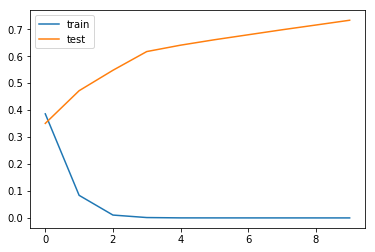

In [22]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=1,callbacks=[es,mc])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 9s 343us/step - loss: 7.9733e-06 - acc: 1.0000 - val_loss: 0.7503 - val_acc: 0.8642

Epoch 00001: val_acc improved from -inf to 0.86416, saving model to /content/gdrive/My Drive/Assignment/SentimentClassification/best_embed_model.h5
Epoch 2/10
25000/25000 [==============================] - 9s 340us/step - loss: 5.2507e-06 - acc: 1.0000 - val_loss: 0.7674 - val_acc: 0.8648

Epoch 00002: val_acc improved from 0.86416 to 0.86476, saving model to /content/gdrive/My Drive/Assignment/SentimentClassification/best_embed_model.h5
Epoch 3/10
25000/25000 [==============================] - 9s 353us/step - loss: 3.4211e-06 - acc: 1.0000 - val_loss: 0.7838 - val_acc: 0.8651

Epoch 00003: val_acc improved from 0.86476 to 0.86508, saving model to /content/gdrive/My Drive/Assignment/SentimentClassification/best_embed_model.h5
Epoch 4/10
25000/25000 [==============================] - 8s 336us/step

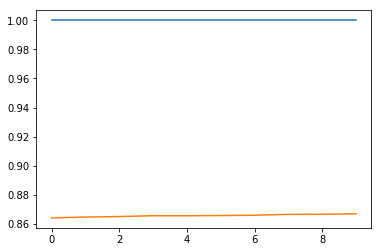

In [24]:
history1 = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=1,callbacks=[es,mc])
plt.plot(history1.history['acc'], label='train')
plt.plot(history1.history['val_acc'], label='test')
plt.show()

In [25]:
scores = model.evaluate(x=x_test,y=y_test,verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

25000/25000 [==============================] - 2s 65us/step
Accuracy: 86.70%


In [26]:
predict_sentiment = model.predict(x_test,verbose=1)

25000/25000 [==============================] - 1s 47us/step


In [27]:
datacount = 0
diff = 0
for predicted in predict_sentiment:
  #print(predicted[0])
  #print(np.round(predicted[0]).astype(int))
  #print(y_test[datacount])
  if(np.round(predicted[0]).astype(int) != y_test[datacount]):
    #print(datacount)
    diff = diff + 1
  datacount = datacount + 1

print(diff)
print(np.round(predict_sentiment[8][0]).astype(int))
print(y_test[8])

3325
1
0


## Retrive the output of each layer in keras for a given single test sample from the trained model you built

In [28]:
for layer in model.layers:
  print(layer.output)
  print(layer.name)

Tensor("embedding_1/embedding_lookup/Identity:0", shape=(?, 300, 64), dtype=float32)
embedding_1
Tensor("flatten_1/Reshape:0", shape=(?, ?), dtype=float32)
flatten_1
Tensor("dense_1/Relu:0", shape=(?, 64), dtype=float32)
dense_1
Tensor("dense_2/Sigmoid:0", shape=(?, 1), dtype=float32)
dense_2


In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 64)           640000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 19200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1228864   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,868,929
Trainable params: 1,868,929
Non-trainable params: 0
_________________________________________________________________


In [35]:
from keras import backend as K

# with a Sequential model
get_1st_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
layer_1_output = get_1st_layer_output([x_test])[0]
print(layer_1_output)
print(layer_1_output.shape)

get_2nd_layer_output = K.function([model.layers[1].input],
                                  [model.layers[2].output])
layer_2_output = get_2nd_layer_output(get_1st_layer_output([x_test]))[0]
print(layer_2_output)
print(layer_2_output.shape)

get_3rd_layer_output = K.function([model.layers[2].input],
                                  [model.layers[3].output])
layer_3_output = get_3rd_layer_output(get_2nd_layer_output(get_1st_layer_output([x_test])))[0]
print(layer_3_output)
print(layer_3_output.shape)

[[ 0.00409998  0.00455983 -0.02566081 ... -0.02682003  0.01163392
  -0.06290258]
 [ 0.00409998  0.00455983 -0.02566081 ...  0.0932086  -0.10233913
  -0.00987751]
 [ 0.01968275  0.03863452 -0.02370966 ... -0.12137348  0.13599008
   0.03973586]
 ...
 [ 0.00409998  0.00455983 -0.02566081 ... -0.05492206 -0.04028133
   0.04988652]
 [ 0.00409998  0.00455983 -0.02566081 ...  0.0430967   0.05726205
   0.16795874]
 [ 0.00409998  0.00455983 -0.02566081 ... -0.06588116 -0.04217172
   0.0208912 ]]
(25000, 19200)
[[1.2616357  1.469406   1.0861648  ... 0.8480471  1.2825872  1.470217  ]
 [0.         0.         2.5933151  ... 2.7975936  0.         0.        ]
 [1.0088317  0.7388139  1.3779321  ... 0.9929667  0.8377773  0.8173212 ]
 ...
 [1.3716075  1.4130703  0.9475483  ... 0.67041487 1.4840094  1.4421314 ]
 [1.3973402  1.9202766  0.589935   ... 0.48567253 1.5308374  1.5631331 ]
 [0.6321697  0.7478243  1.3484935  ... 1.3066761  0.60559916 0.64044017]]
(25000, 64)


InvalidArgumentError: ignored

In [149]:
layer_output.shape

(25000, 1)

In [141]:
intermediate_output[0].shape

(300, 64)